In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

C:\Users\srikanth\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.10.0'

In [3]:
df = pd.read_excel('./data/BigMaxIndex.xlsx',sheet_name='BigMaxIndex')

In [4]:
df.head()

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


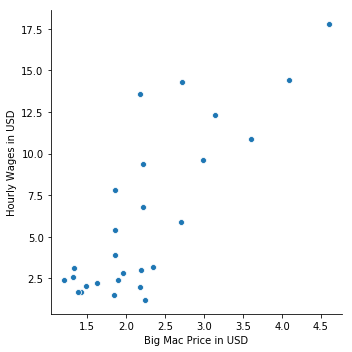

In [5]:
sns.relplot(x='Big Mac Price in USD',y='Hourly Wages in USD',data=df)

In [6]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Sklearn

In [7]:
X= df.iloc[:,1:2]
y= df.iloc[:,-1:]

In [8]:
X.shape

(27, 1)

### split intopart
- training (80%)
- testing (20%)

In [9]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21, 1), (6, 1), (21, 1), (6, 1))

In [11]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
regressor.coef_,regressor.intercept_

(array([[4.70589094]]), array([-4.29349235]))

In [13]:
y_pred = -4.31 + 4.69 * x_train

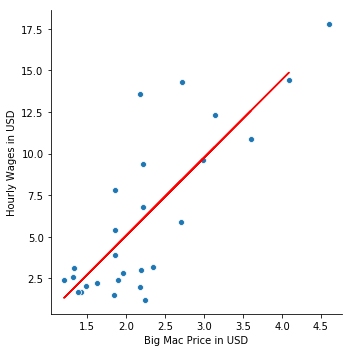

In [14]:
sns.relplot(x='Big Mac Price in USD',y='Hourly Wages in USD',data=df)
plt.plot(x_train,y_pred,'r')

In [15]:
df.columns = ['Country', 'BigMacPriceUSD', 'HourlyWagesUSD']

In [16]:
df.head()

,Country,BigMacPriceUSD,HourlyWagesUSD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


In [17]:
# Stats model
regressor_sm = smf.ols(formula='HourlyWagesUSD~BigMacPriceUSD',data=df).fit()

In [18]:
print(regressor_sm.summary())

                            OLS Regression Results                            
Dep. Variable:         HourlyWagesUSD   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.50e-07
Time:                        12:06:53   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.5397      1.619     -2.

# Neural Network
- Stochastic Gradient Descent

![GradientDescent](https://bit.ly/2uC182x)
![parabola](https://bit.ly/2I2CakT)

> ## Forward Pass

In [19]:
# Create placeholders
with tf.name_scope(name='PlaceHolder'):
    X = tf.placeholder(dtype=tf.float32,shape=[None,1],name='BigMacPrice')
    y = tf.placeholder(dtype=tf.float32,shape=[None,1],name='HourlyWages')

In [20]:
# Variable (# Null hypothesis a= 0 and b = 0)
with tf.name_scope(name='Variables'):
    a = tf.Variable(initial_value=0.0,dtype=tf.float32)
    b = tf.Variable(initial_value=0.0,dtype=tf.float32)

In [21]:
# layer -1 ( X * b)
layer1 = tf.multiply(X,b,name='Layer1')
y_pred = tf.add(layer1,a,name='Layer2')

In [22]:
# Visualize graph in tensorboard
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) # initialize global variable initializer
    writer = tf.summary.FileWriter('./nnregression',graph=sess.graph)
    writer.close()

![graph](network_1.png)

> ## Backward Pass

In [23]:
# cost or loss or error (sum of square error)
loss = tf.reduce_sum(tf.square(tf.subtract(y,y_pred)))

In [24]:
# stochastic graident
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [25]:
train = optimizer.minimize(loss)

In [26]:
# Visualize graph in tensorboard
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) # initialize global variable initializer
    writer = tf.summary.FileWriter('./nnregression_with_backwardpass',graph=sess.graph)
    writer.close()

![network](network_2.png)

# Train neural network

- Tensorflow can't support pandas 
- Tensorflow support numpy

In [27]:
x_train = x_train.values # convert pandas into numpy
y_train = y_train.values # convert pandas into numpy
x_test = x_test.values # convert pandas into numpy
y_test = y_test.values # convert pandas into numpy

### Batching
bath_size = 5 
- randomly passing 5 variable

In [28]:
def bathching(start,stop,batchsize):
    ind = np.random.randint(start,stop,(batchsize))
    return ind

ind = bathching(0,21,5)
x_train[ind],y_train[ind]

In [35]:
def ploting(slope,intercept):
    y_pred = intercept + slope * x_train
    #HourlyWagesUSD~BigMacPriceUSD
    sns.relplot(x='BigMacPriceUSD',y='HourlyWagesUSD',data=df)
    plt.plot(x_train,y_pred,'r')

INFO: Epoch: 0 , loss = 823.49 , intercept = 0.31, slope =0.55
INFO: Epoch: 100 , loss = 216.53 , intercept = -2.44, slope =3.45
INFO: Epoch: 200 , loss = 183.81 , intercept = -3.67, slope =4.61
INFO: Epoch: 300 , loss = 181.81 , intercept = -3.96, slope =4.46
INFO: Epoch: 400 , loss = 183.39 , intercept = -4.09, slope =4.79
INFO: Epoch: 500 , loss = 188.90 , intercept = -4.36, slope =4.46
INFO: Epoch: 600 , loss = 187.40 , intercept = -4.52, slope =4.55
INFO: Epoch: 700 , loss = 180.58 , intercept = -4.54, slope =4.84
INFO: Epoch: 800 , loss = 186.22 , intercept = -4.60, slope =4.60
INFO: Epoch: 900 , loss = 207.64 , intercept = -4.09, slope =5.11
INFO: Epoch: 1000 , loss = 191.23 , intercept = -4.23, slope =4.99
INFO: Epoch: 1100 , loss = 188.94 , intercept = -4.48, slope =5.06
INFO: Epoch: 1200 , loss = 292.51 , intercept = -4.13, slope =5.63
INFO: Epoch: 1300 , loss = 193.52 , intercept = -4.12, slope =4.98
INFO: Epoch: 1400 , loss = 183.44 , intercept = -4.34, slope =4.89
INFO: Ep

C:\Users\srikanth\Anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


INFO: Epoch: 2000 , loss = 181.60 , intercept = -4.22, slope =4.57
INFO: Epoch: 2100 , loss = 232.87 , intercept = -4.39, slope =4.07
INFO: Epoch: 2200 , loss = 198.88 , intercept = -4.45, slope =4.37
INFO: Epoch: 2300 , loss = 180.31 , intercept = -4.32, slope =4.70
INFO: Epoch: 2400 , loss = 189.39 , intercept = -4.37, slope =4.45
INFO: Epoch: 2500 , loss = 180.48 , intercept = -4.46, slope =4.81
INFO: Epoch: 2600 , loss = 215.55 , intercept = -4.66, slope =4.30
INFO: Epoch: 2700 , loss = 180.98 , intercept = -4.62, slope =4.90
INFO: Epoch: 2800 , loss = 191.92 , intercept = -4.22, slope =5.00
INFO: Epoch: 2900 , loss = 286.45 , intercept = -4.02, slope =5.56
INFO: Epoch: 3000 , loss = 191.00 , intercept = -4.42, slope =5.06
INFO: Epoch: 3100 , loss = 191.61 , intercept = -4.50, slope =4.48
INFO: Epoch: 3200 , loss = 182.19 , intercept = -4.45, slope =4.64
INFO: Epoch: 3300 , loss = 181.27 , intercept = -4.24, slope =4.78
INFO: Epoch: 3400 , loss = 180.93 , intercept = -4.01, slope =

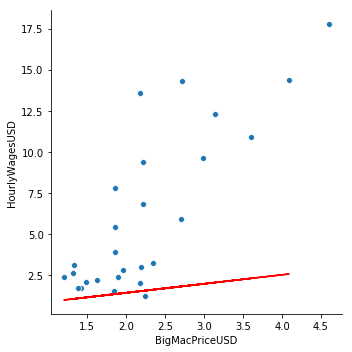

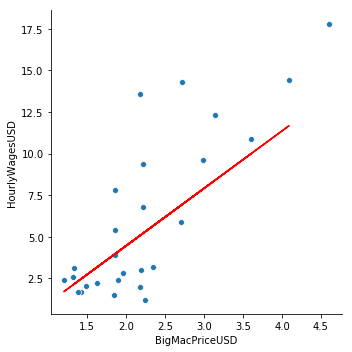

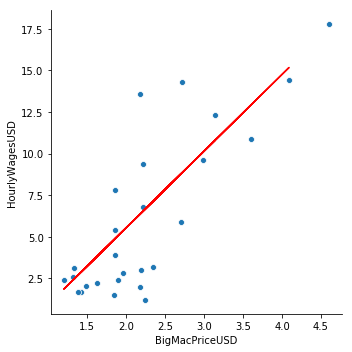

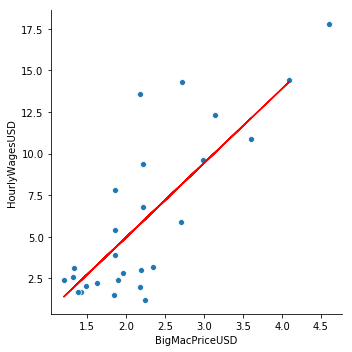

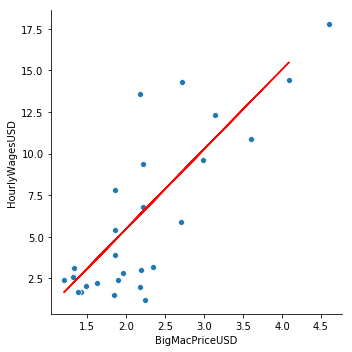

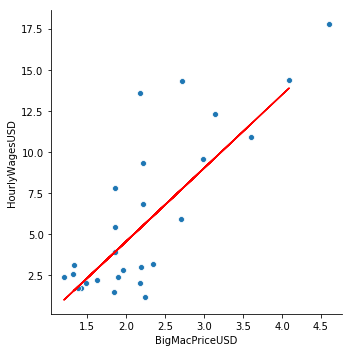

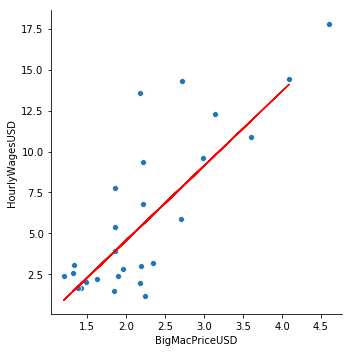

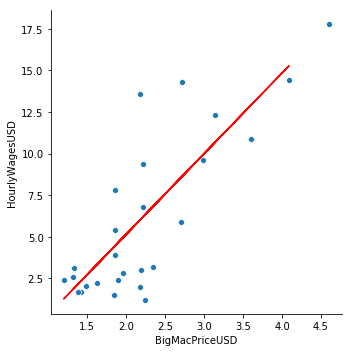

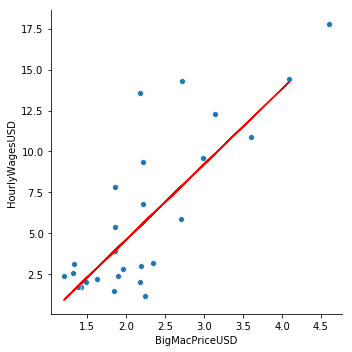

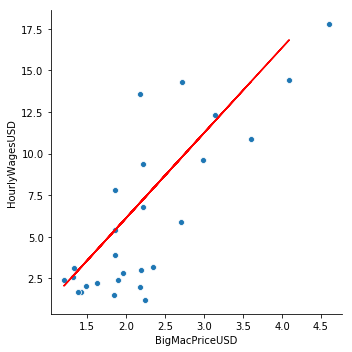

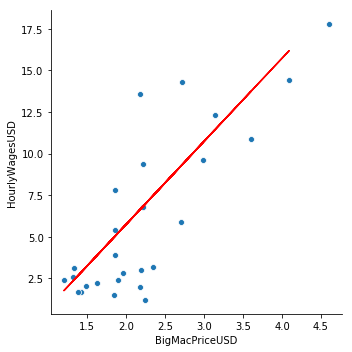

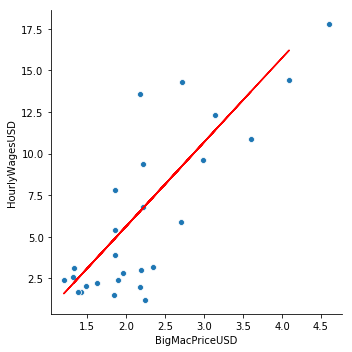

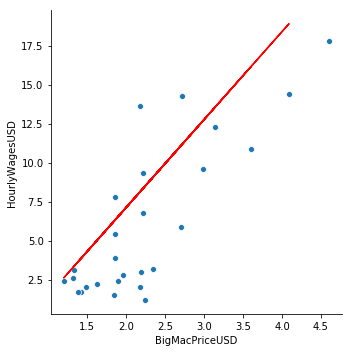

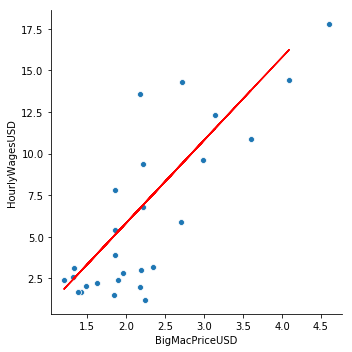

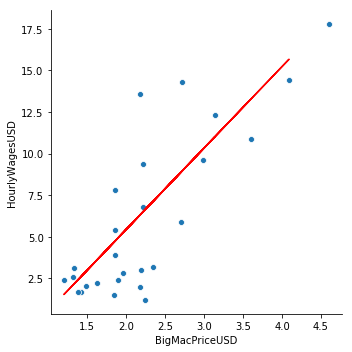

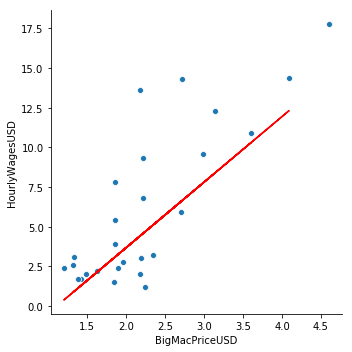

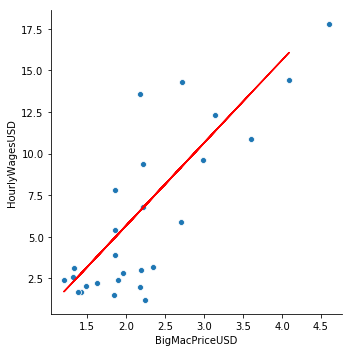

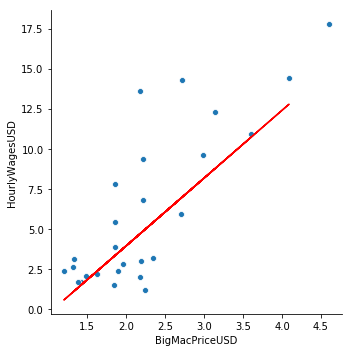

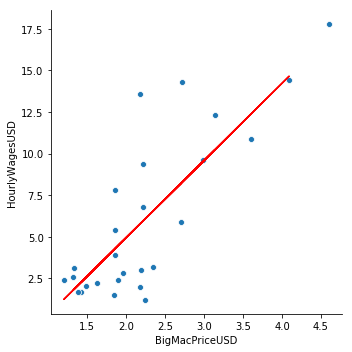

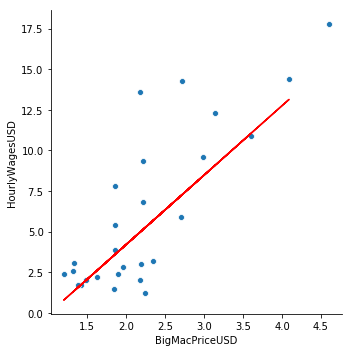

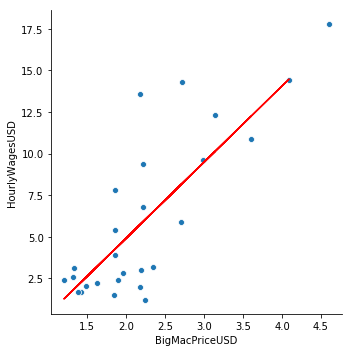

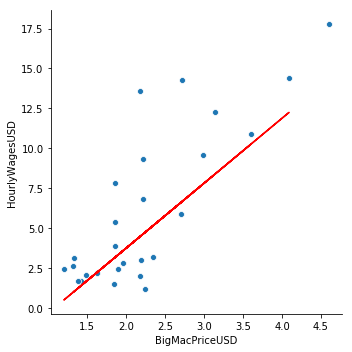

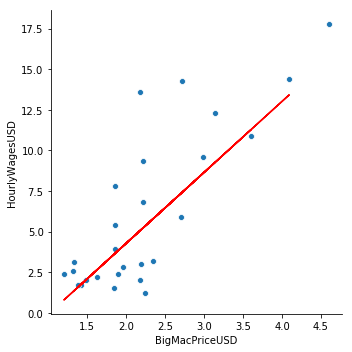

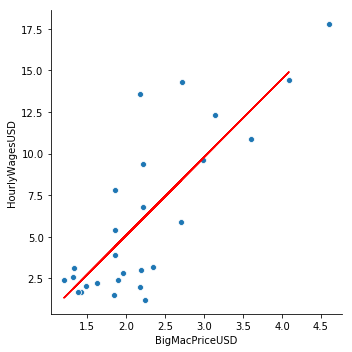

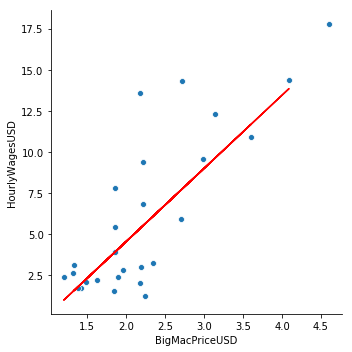

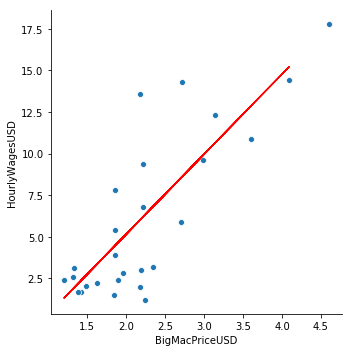

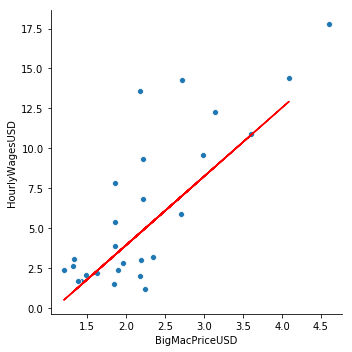

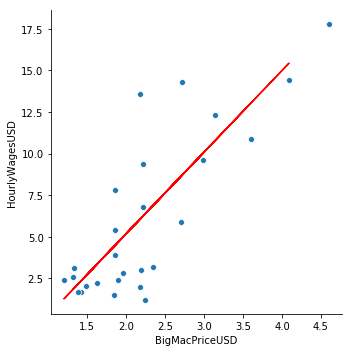

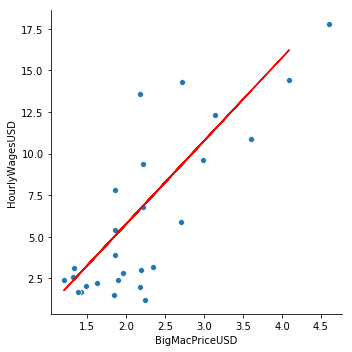

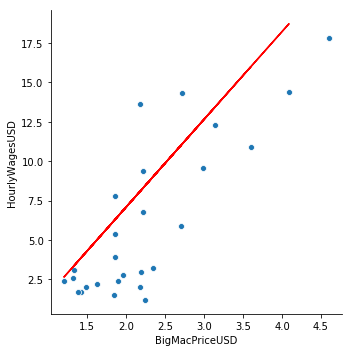

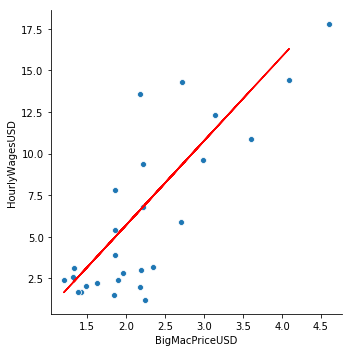

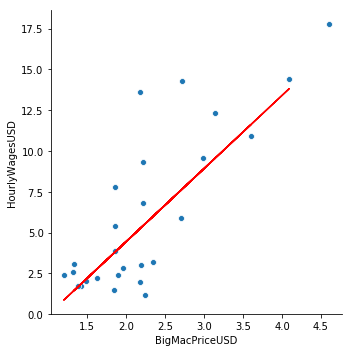

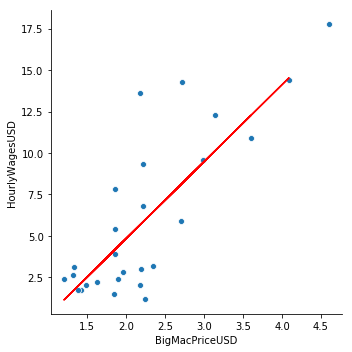

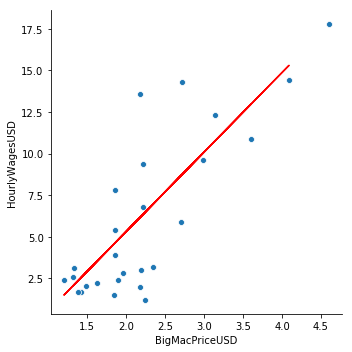

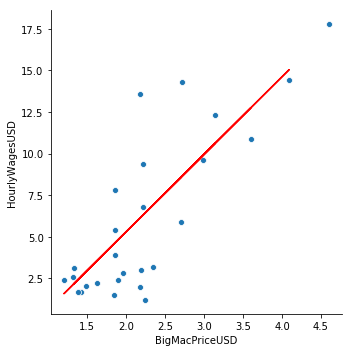

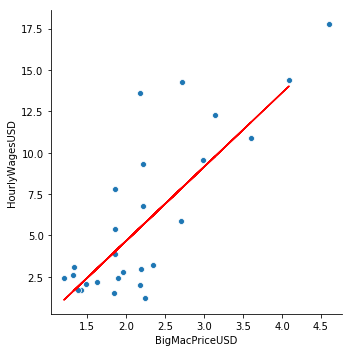

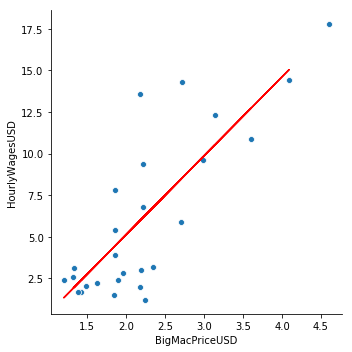

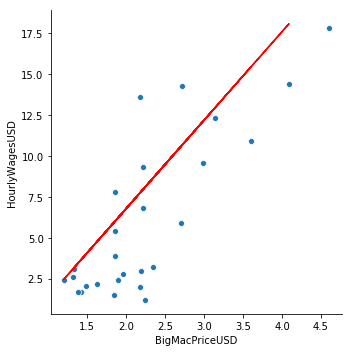

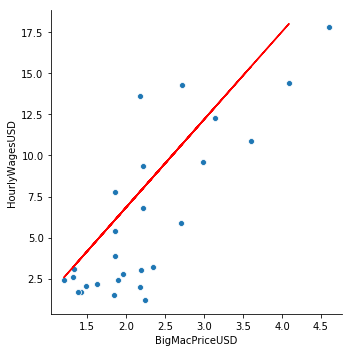

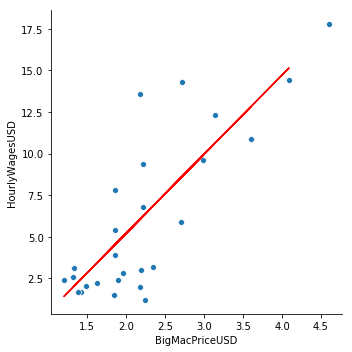

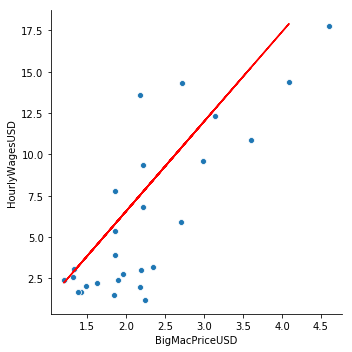

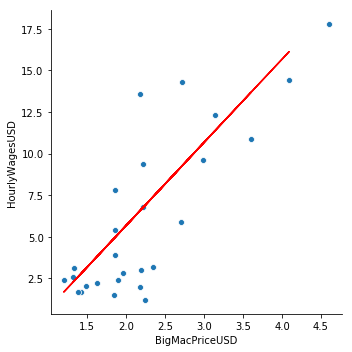

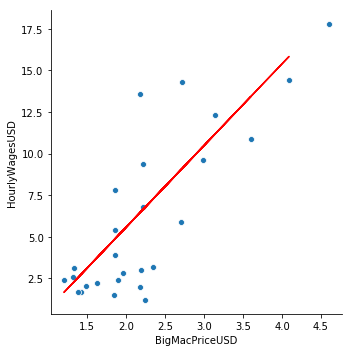

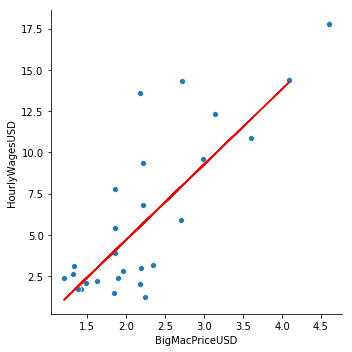

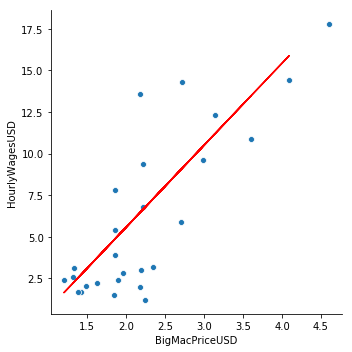

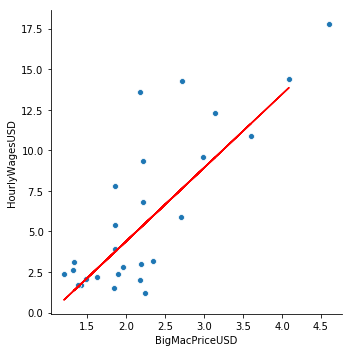

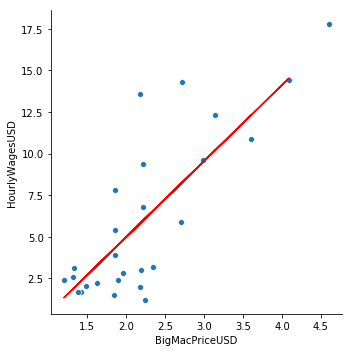

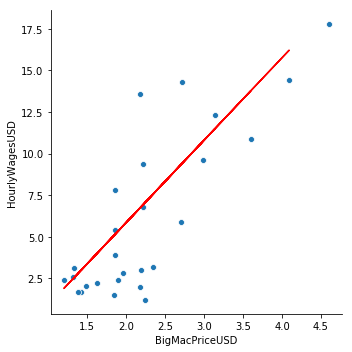

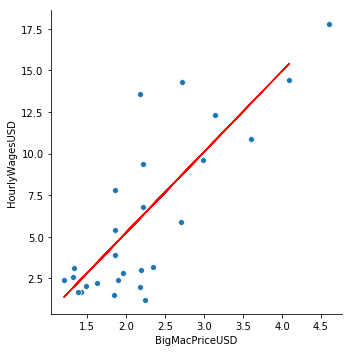

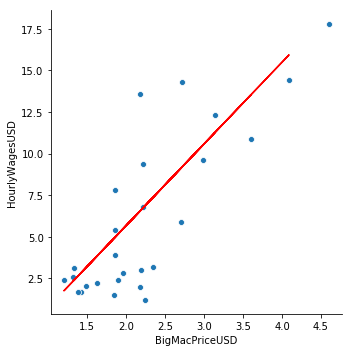

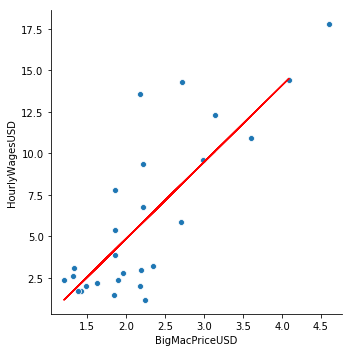

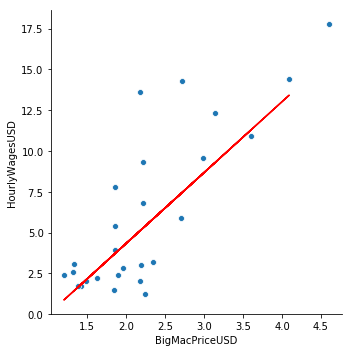

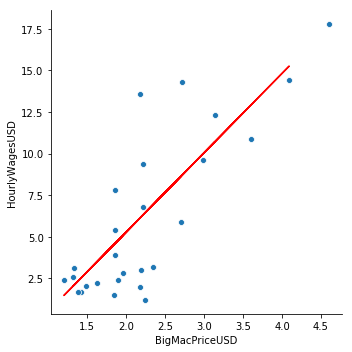

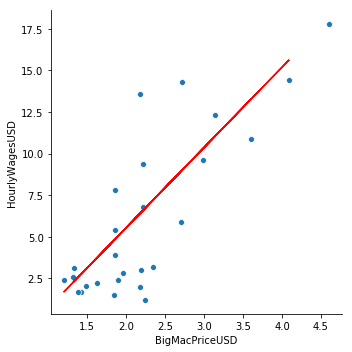

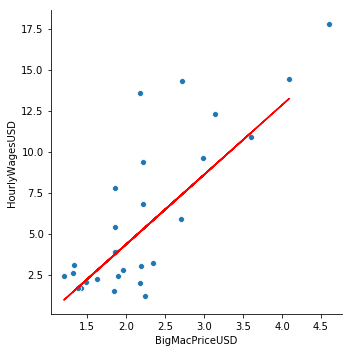

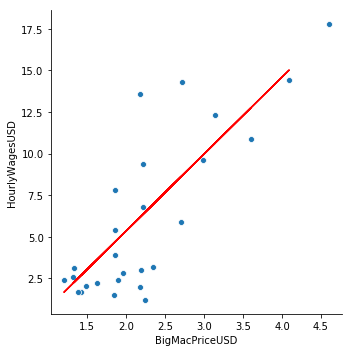

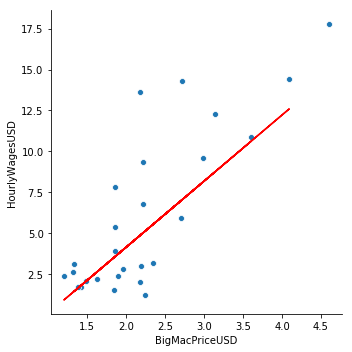

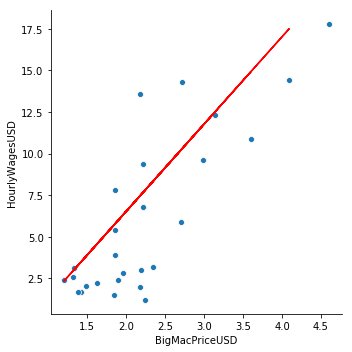

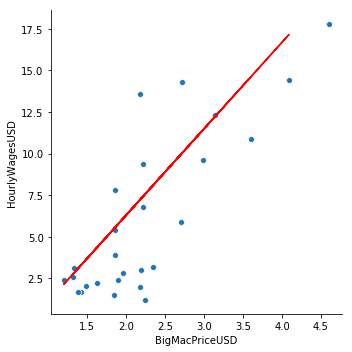

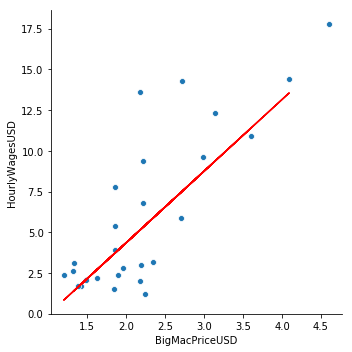

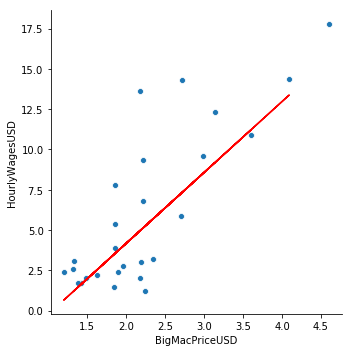

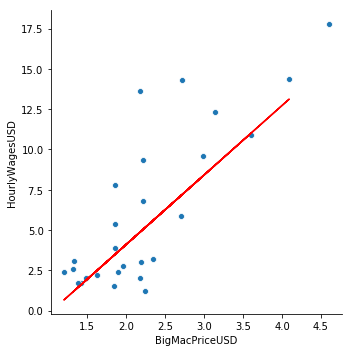

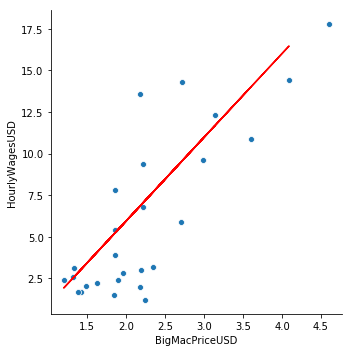

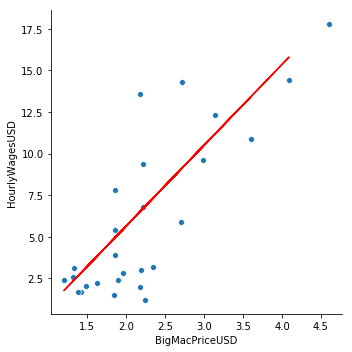

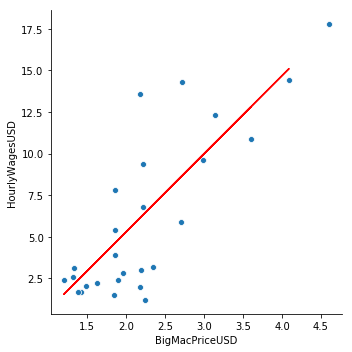

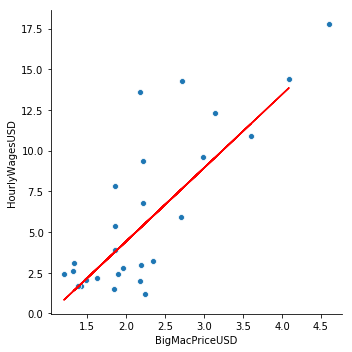

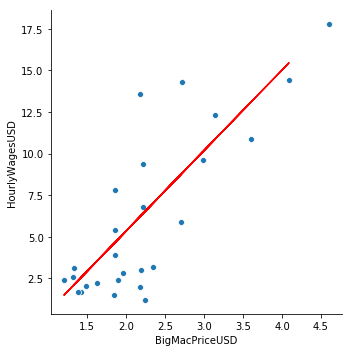

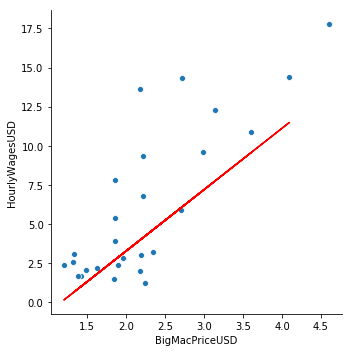

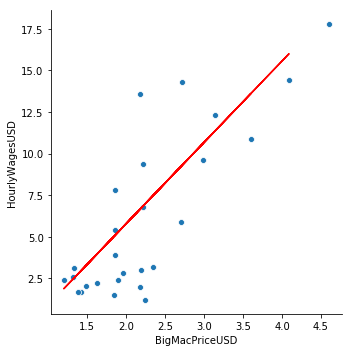

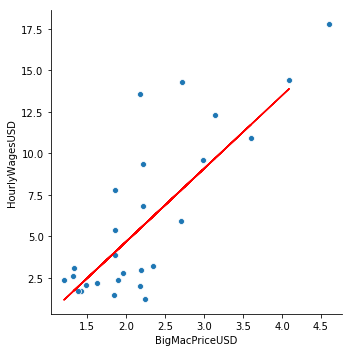

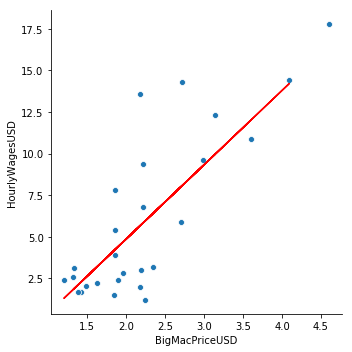

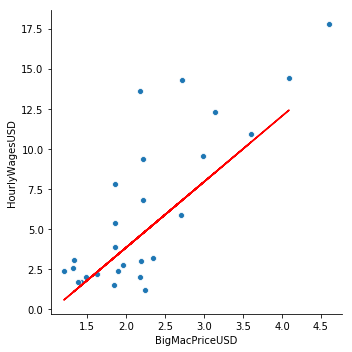

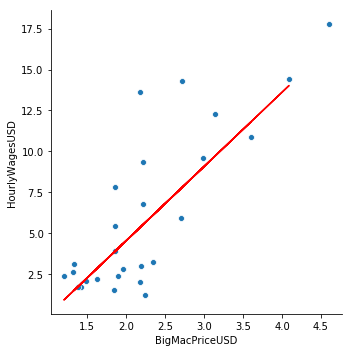

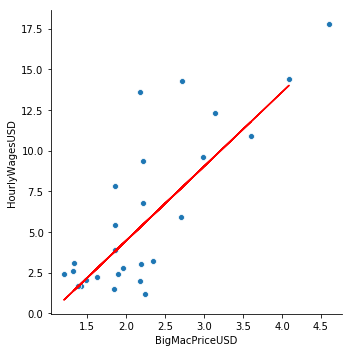

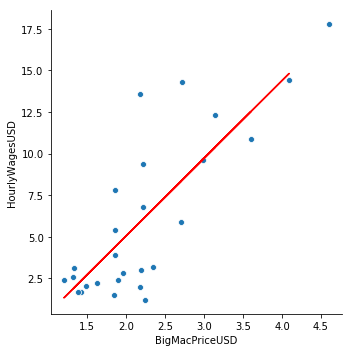

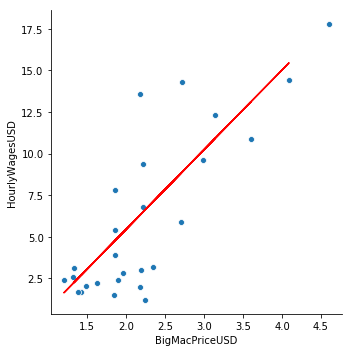

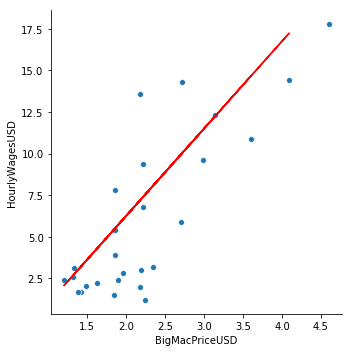

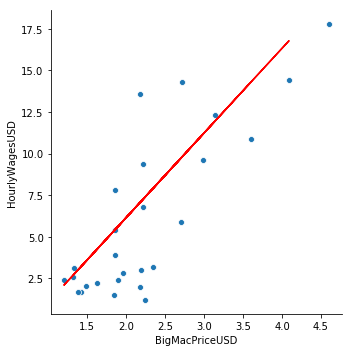

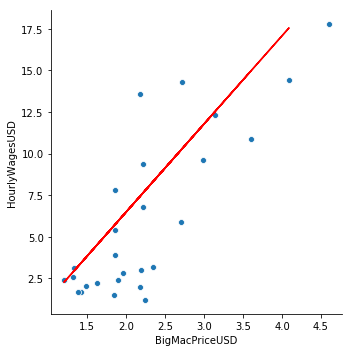

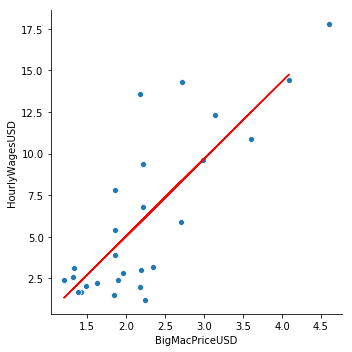

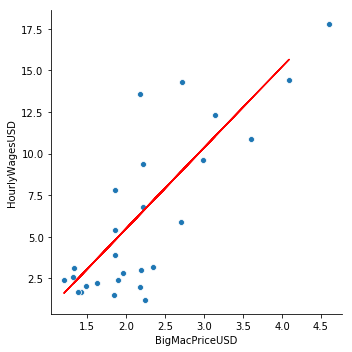

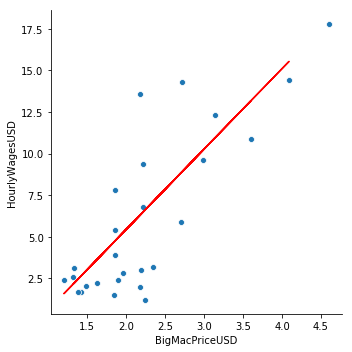

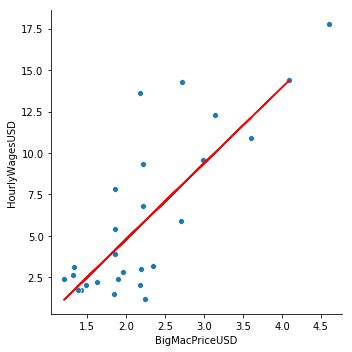

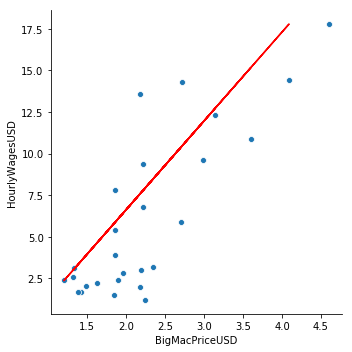

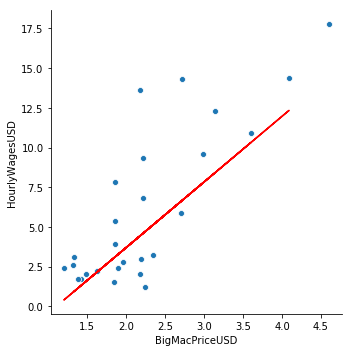

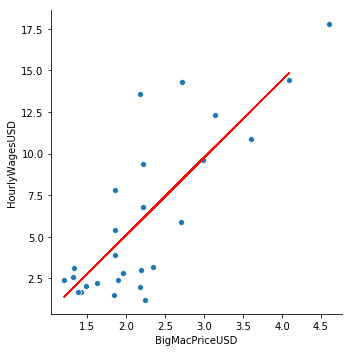

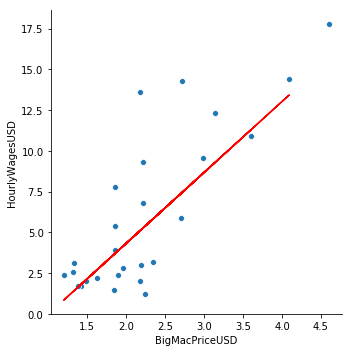

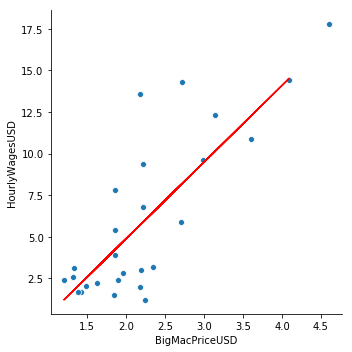

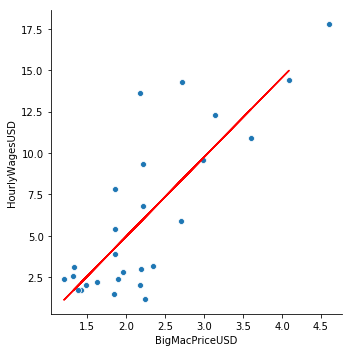

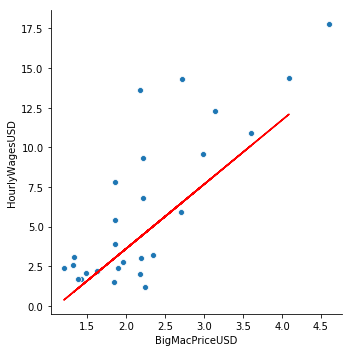

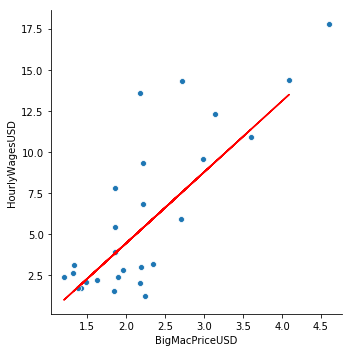

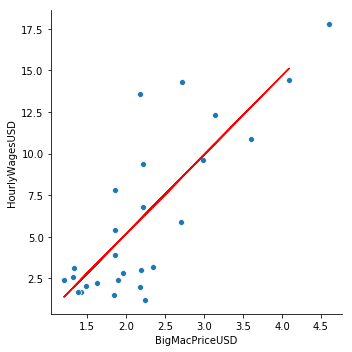

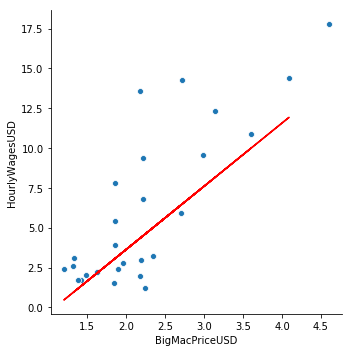

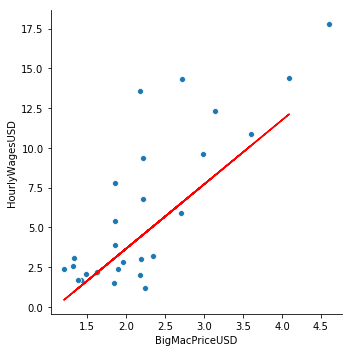

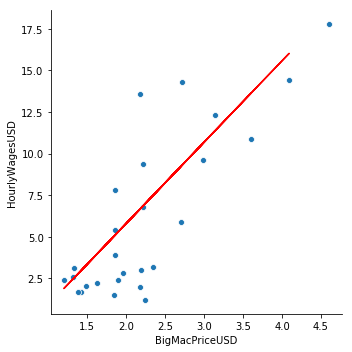

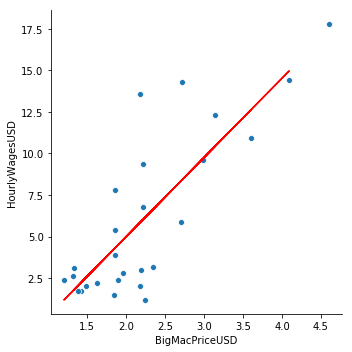

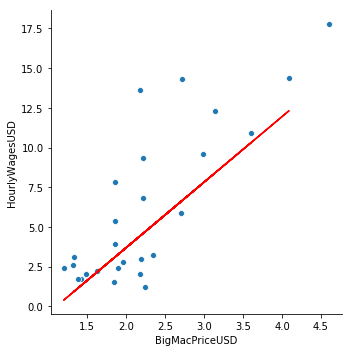

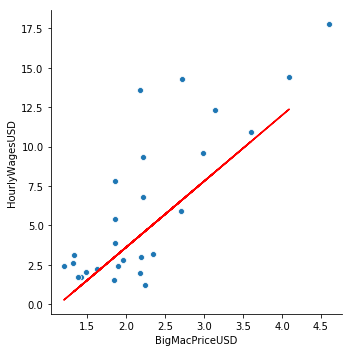

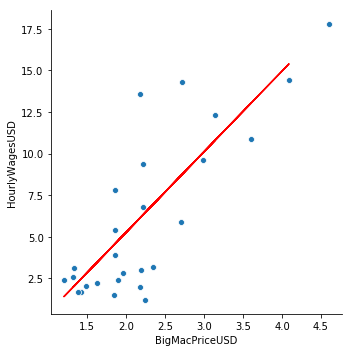

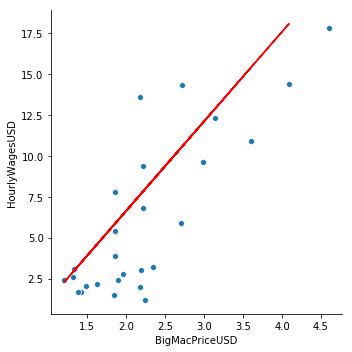

In [47]:
# traning
epochs = 10000
epochlist =[]
interceptlist = []
slopelist = []
costlist = []
with tf.Session() as sess:
    sess.run(init)
    # 
    for i in range(epochs):
        ind = bathching(0,21,5)
        sess.run(train,feed_dict={X:x_train[ind],y:y_train[ind]})
        # fetching values for every 100th iteration
        if i % 100 == 0: # remainder
            # a, b , loss
            intercept,slope,cost = sess.run([a,b,loss],
                                            feed_dict={X:x_train,y:y_train})
            ploting(slope,intercept)
            epochlist.append(i)
            interceptlist.append(intercept)
            slopelist.append(slope)
            costlist.append(cost)

            print('INFO: Epoch: %s , loss = %0.2f , intercept = %0.2f, slope =%0.2f'%(
                i,cost,intercept,slope))

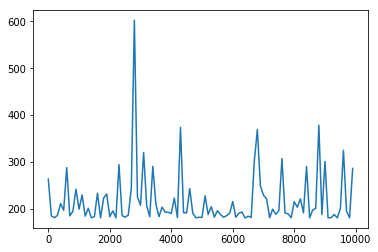

In [46]:
plt.plot(epochlist,costlist)